# FREV from NXCALS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from scipy.optimize import curve_fit
from datetime import datetime

In [17]:
# build the query and load data into spark dataframe UTC Time
start = "2022-11-24 15:00:00.000"
end = "2022-11-25 06:00:00.000"
df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PA.FREV-SD/Samples").build().toPandas()

In [33]:
dfm = df.where(df.selector == 'CPS.USER.EAST3').dropna(subset=['acqStamp'], how='all')
dfm.reset_index(inplace=True)


{'elements': array([177.49905586, 177.50024796, 177.49905586, ..., 442.33262539,
        442.56716967, 442.43782759]),
 'dimensions': array([   1, 1760], dtype=int32)}

Text(0, 0.5, 'FREV [Hz]')

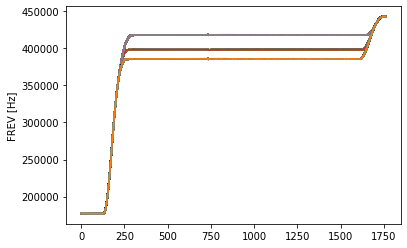

In [69]:
fig, ax = plt.subplots()

for selector in ["CPS.USER.EAST3", "CPS.USER.EAST4", "CPS.USER.MD5"]:
    dfm = df.where(df.selector == selector).dropna(subset=['acqStamp'], how='all')
    dfm.reset_index(inplace=True)

    for i in range(len(dfm)):
        ax.plot(dfm.samples[i]["elements"]*1000)
        
ax.set_ylabel("FREV [Hz]")

In [48]:
dfm.samples[0]["elements"][1000]

385.3234648704529

In [86]:
for selector in ["CPS.USER.EAST3", "CPS.USER.EAST4", "CPS.USER.MD5"]:
    dfm = df.where(df.selector == selector).dropna(subset=['acqStamp'], how='all')
    dfm.reset_index(inplace=True)

    dfm["frev"] = [x["elements"][1000] for x in dfm.samples]

    print(selector)
    print(f"frev = {round(dfm.frev.median(),1)} [kHz]")
    
    print(f"frev/3 = {round(dfm.frev.median()/3,1)} [kHz]")
    
    print("")

CPS.USER.EAST3
frev = 397.8 [kHz]
frev/3 = 132.6 [kHz]

CPS.USER.EAST4
frev = 417.7 [kHz]
frev/3 = 139.2 [kHz]

CPS.USER.MD5
frev = 385.4 [kHz]
frev/3 = 128.5 [kHz]



In [63]:
130*1e3*3

390000.0

In [68]:
1/385396

2.594733728424789e-06